### Basic Autograd with scaler values

z - x^2 + y ^3

given x = 2 and y = 3
what is dz/dx and dz/dy

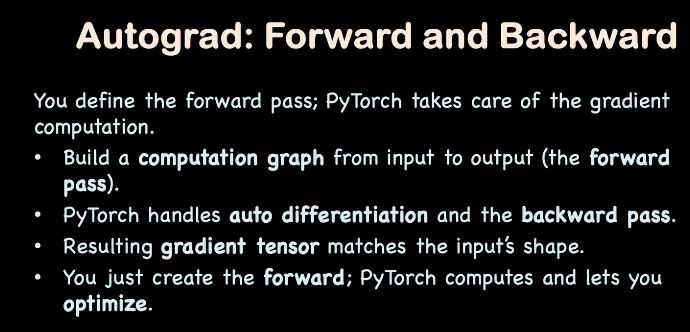

In [1]:
import torch

c:\Users\Imsac\Desktop\Project_X\Pytorch\pytorch_code\.Lpytorch\Lib\site-packages\torch\_subclasses\functional_tensor.py:283: UserWarning: Failed to initialize NumPy: No module named 'numpy' (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\utils\tensor_numpy.cpp:84.)
  cpu = _conversion_method_template(device=torch.device("cpu"))


In [2]:
x = torch.tensor(2.0, requires_grad=True)
y = torch.tensor(3.0, requires_grad=True)

# Forward pass compute
z = x ** 2 + y**3
print(f"z = {x}^2 + {y}^3 = {z}")

z = 2.0^2 + 3.0^3 = 31.0


In [3]:
# backward PAss
z.backward()
dz_dx = x.grad # partial derivative wrt x
dz_dy = y.grad # partial derivative wrt y
print(f"dz/dx={dz_dx}\ndz/dy={dz_dy} = {dz_dy}]")

dz/dx=4.0
dz/dy=27.0 = 27.0]


Chain rule

In [4]:
x = torch.tensor(2.0 , requires_grad=True)
y = x**2
z = y + 1
w = z**2
print(f"x = {x} \ny = x^2 = {y} \nz = y + 1 = {z} \nw = z^2 = {w}")

x = 2.0 
y = x^2 = 4.0 
z = y + 1 = 5.0 
w = z^2 = 25.0


In [8]:
dw_dz = torch.autograd.grad(outputs=w, inputs=z, retain_graph=True)[0]
dz_dy = torch.autograd.grad(outputs=z, inputs=y, retain_graph=True)[0]
dy_dx = torch.autograd.grad(outputs=y, inputs=x, retain_graph=True)[0]

print(f"dw/dz={dw_dz}\ndz/dy={dz_dy}\ndy/dx={dy_dx}")

dw/dz=10.0
dz/dy=1.0
dy/dx=4.0


In [9]:
dw_dx = dw_dz * dz_dy * dy_dx
print(f"dw/dx={dw_dx}")

dw/dx=40.0


In [10]:
w.backward()
print(f"dw/dx={x.grad}")

dw/dx=40.0


In [12]:
x = torch.tensor([1.0, 2.4, 3.0], requires_grad=True)
y = x * 2
z = y + 1
w = z*2
w.sum().backward()
print(f"dw/dx={x.grad}")

dw/dx=tensor([4., 4., 4.])


### Gradient Accumulation

In [14]:
x = torch.tensor(1.0, requires_grad=True)

# first computation
y1 = x**2
y1.backward()

print(f"dy1/dx={x.grad}")

dy1/dx=2.0


In [15]:
y2 = x**3
y2.backward()
print(f" After second backward: x grad dy2/dx={x.grad}")

 After second backward: x grad dy2/dx=5.0


In [16]:
print(x.grad)

tensor(5.)


#### So the above exaple shows how gradient accumulates. So to overcome this behaviour we can manually zero out the graadients.

In [20]:
x = torch.tensor(1.0, requires_grad=True)

# first computation
y1 = x**2
y1.backward()

print(f"dy1/dx={x.grad}")

dy1/dx=2.0


In [22]:
x.grad.zero_() # zero the gradients before next backward

tensor(0.)

In [23]:
y2 = x**3
y2.backward()
print(f" After second backward: x grad dy2/dx={x.grad}")

 After second backward: x grad dy2/dx=3.0


In [24]:
print(x.grad)

tensor(3.)


This time x.grad is not accumulated. bcoz we did x.grad.zero_()